# Task 3 - Exploratory Data Analysis - Retail

## Performing 'Exploratory Data Analysis' on dataset 'SampleSuperstore' 

### Muhammed Sabah

In [18]:
## importing necessary libraries
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt

Importing data

In [19]:
os.chdir('C:\\Users\\Sabah\\Downloads')

In [20]:
data = pd.read_csv("SampleSuperstore.csv")

In [21]:
data.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


checking for null values

In [22]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

no null values

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


data types are correct

### checking unique values in different categorical values

In [24]:
print("segment ==>",np.unique(data['Segment']),"\n")
print("Category ==>",np.unique(data['Category']),"\n")
print("Sub category ==>",np.unique(data['Sub-Category']),"\n")
print("Ship mode ==>",np.unique(data['Ship Mode']),"\n")

segment ==> ['Consumer' 'Corporate' 'Home Office'] 

Category ==> ['Furniture' 'Office Supplies' 'Technology'] 

Sub category ==> ['Accessories' 'Appliances' 'Art' 'Binders' 'Bookcases' 'Chairs' 'Copiers'
 'Envelopes' 'Fasteners' 'Furnishings' 'Labels' 'Machines' 'Paper'
 'Phones' 'Storage' 'Supplies' 'Tables'] 

Ship mode ==> ['First Class' 'Same Day' 'Second Class' 'Standard Class'] 



### describing numerical values

In [25]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## we can see that least value of profit is -6599 this shows some things are bringing huge loss in business , we need to identify those and rectify it

### describing categorical variable

In [26]:
data.describe(include = "O")

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,3203,6026,1523


## City from which the business get most of the orders is from NewYork and  the state is California.

## The category which has high sales is OfficeSupplies and in office supplies Binders are the most ordered

## 'Standard Class' is the most used Ship Mode

# Frequency Tables

In [27]:
pd.crosstab(index = data['Ship Mode'] , columns = 'count' , margins = True)

col_0,count,All
Ship Mode,,
First Class,1538,1538
Same Day,543,543
Second Class,1945,1945
Standard Class,5968,5968
All,9994,9994


## Almost 60% is shipped using 'Standard Class' , Second Class constitute almost 20% , First Class is slightly less than that.

In [28]:
pd.crosstab(index = data['Category'] , columns = 'count' , margins = True)

col_0,count,All
Category,,
Furniture,2121,2121
Office Supplies,6026,6026
Technology,1847,1847
All,9994,9994


## Almost 60% products are office supplies

In [29]:
pd.crosstab(index = data['Region'] , columns = 'count' , margins = True)

col_0,count,All
Region,,
Central,2323,2323
East,2848,2848
South,1620,1620
West,3203,3203
All,9994,9994


## Less product purchases is from south

# Data visualization

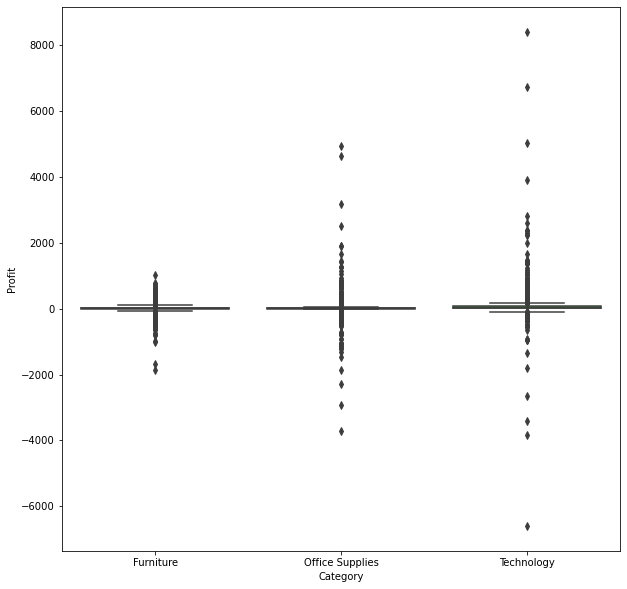

In [30]:
plt.figure(figsize = (10,10))
sns.boxplot(x = "Category", y = "Profit" , data = data)

## The above boxplot shows data has outliers.So we need to choose a profit range to get anything meaningful from data. 

In [31]:
# created a new df with profit range between -1000 and 1000
price_data = data[(data.Profit>-1000)&(data.Profit<1000)]

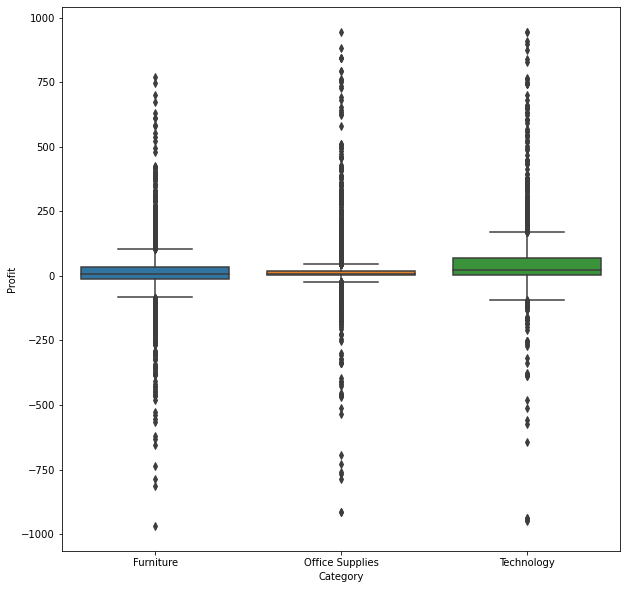

In [32]:
plt.figure(figsize = (10,10))
sns.boxplot(x = "Category", y = "Profit" , data = price_data)

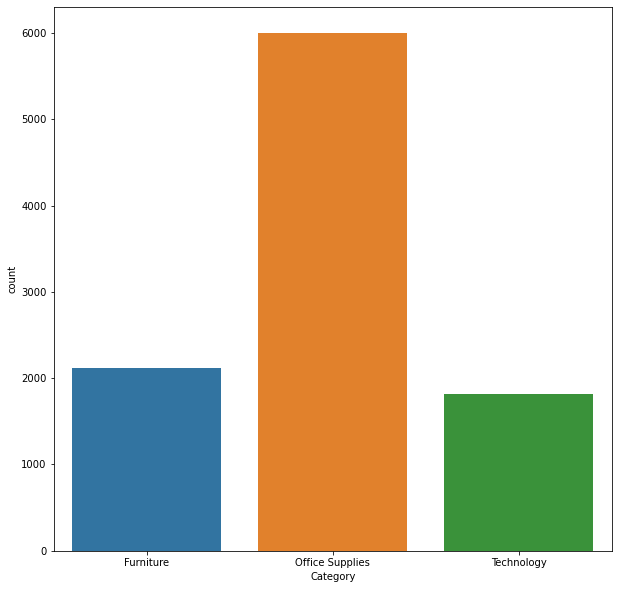

In [34]:
plt.figure(figsize = (10,10))
sns.countplot(x = "Category" , data = price_data)

## Shows most number of items is from office supplies

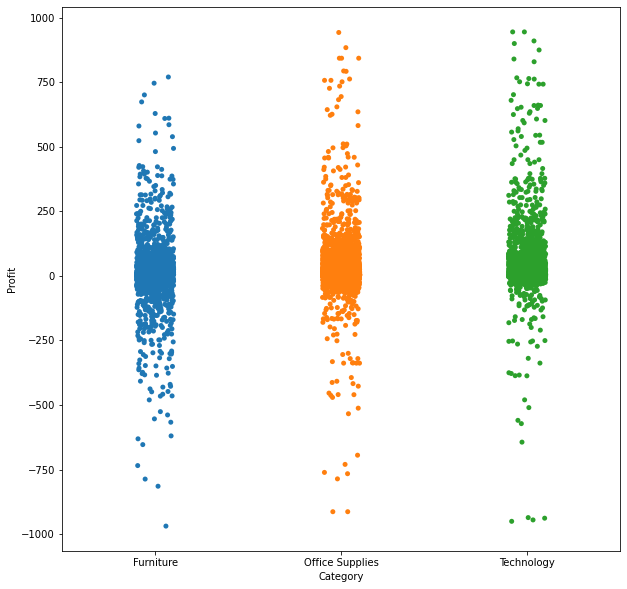

In [35]:
plt.figure(figsize = (10,10))
sns.stripplot(x = "Category", y = "Profit" , data = price_data)

C:\Users\Sabah\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x720 with 0 Axes>

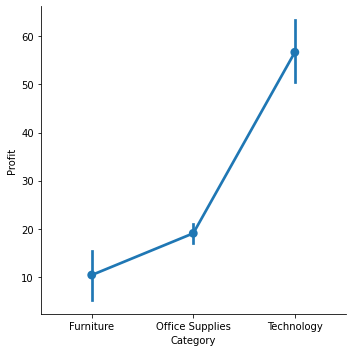

In [38]:
plt.figure(figsize = (10,10))
sns.factorplot(x = "Category", y = "Profit" , data = price_data)

## Taking only positive profits

In [42]:
p_pro = data[(data.Profit>0)]

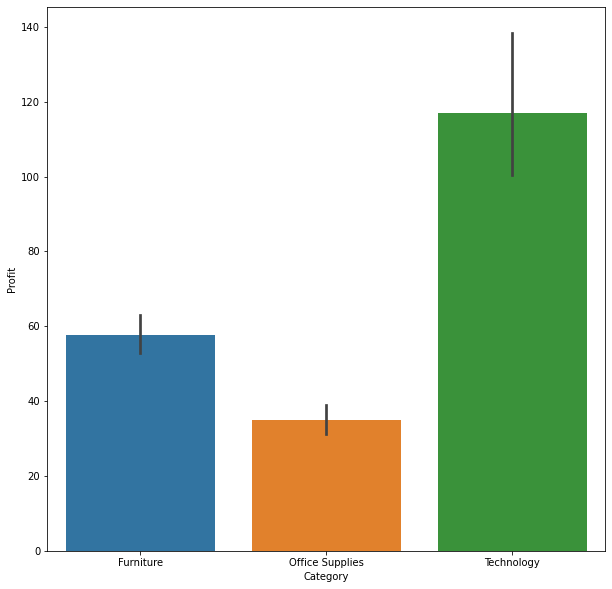

In [44]:
plt.figure(figsize = (10,10))
sns.barplot(x = "Category", y = "Profit" , data = p_pro)

## From above plot we can understand that most of the profit comes from technology

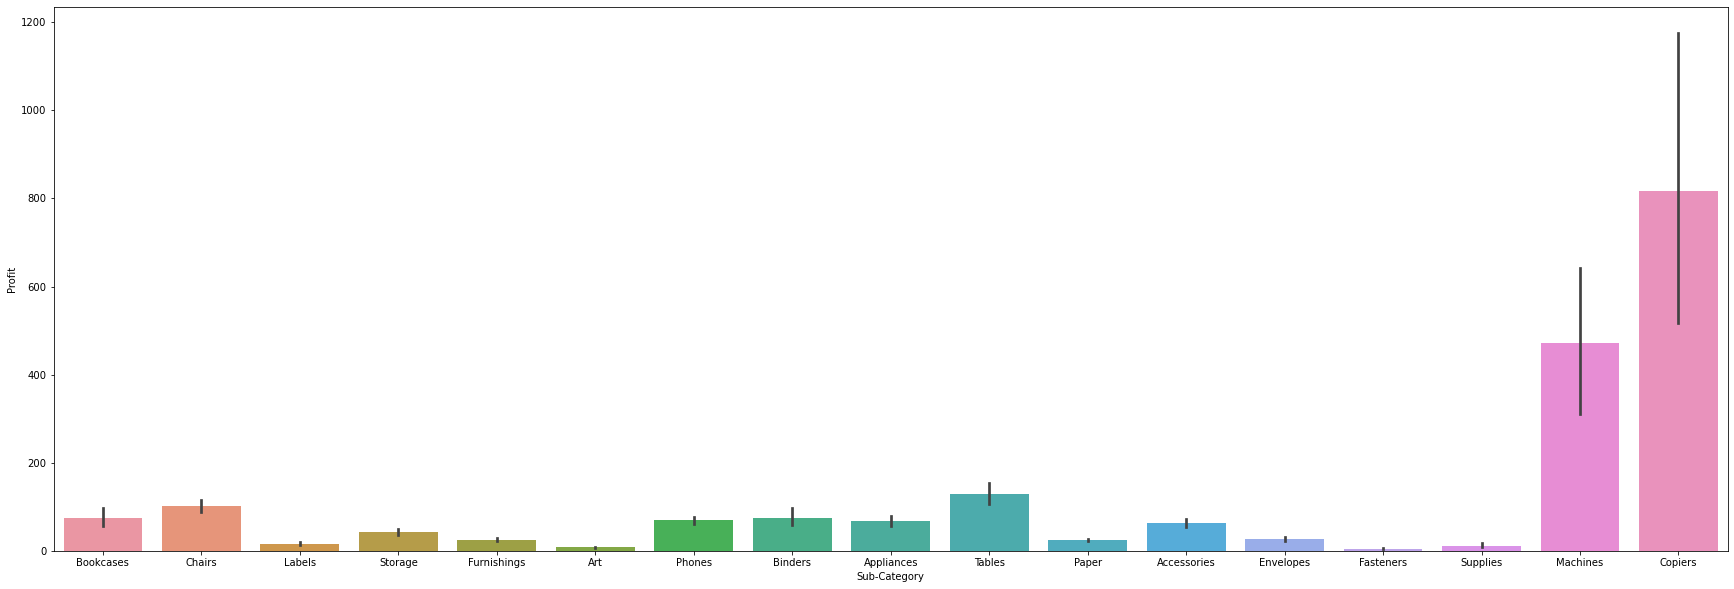

In [46]:
plt.figure(figsize = (30,10))
sns.barplot(x = "Sub-Category", y = "Profit" , data = p_pro)

## This plot shows us that  "copiers" and "machines" gives higher profits 

In [49]:
## Now lets plot a frequency table of this

pd.crosstab( index = p_pro["Sub-Category"] , columns = "count" , margins = True)

col_0,count,All
Sub-Category,,
Accessories,683,683
Appliances,399,399
Art,796,796
Binders,910,910
Bookcases,117,117
Chairs,362,362
Copiers,68,68
Envelopes,254,254
Fasteners,200,200


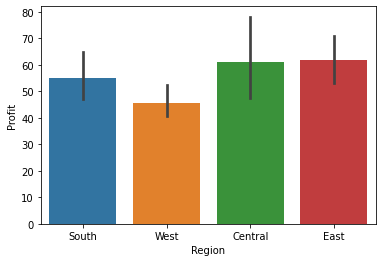

In [60]:
sns.barplot( x = "Region", y = "Profit" ,data = p_pro)

## Copiers and Machines were least sold but made higher profits

## West region made less profits

## Taking only -ve profit

In [55]:
n_pro = data[(data.Profit<0)]

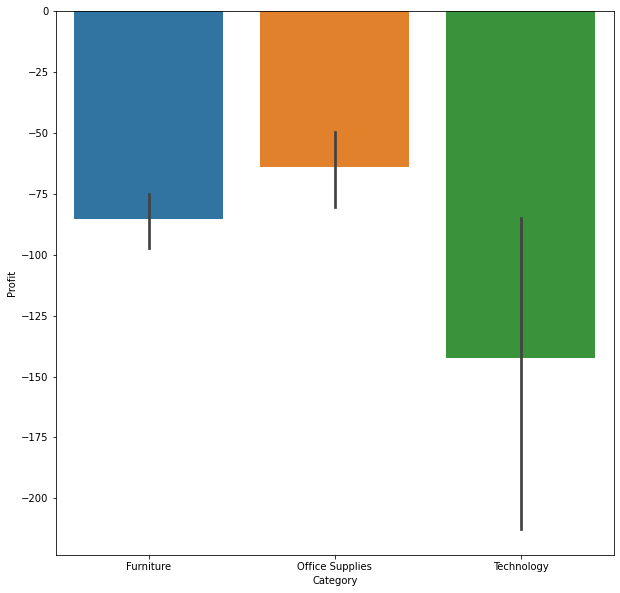

In [57]:
plt.figure(figsize = (10,10))
sns.barplot(x = "Category", y = "Profit" , data = n_pro)

## We can see that technology also causes greater losses in some areas

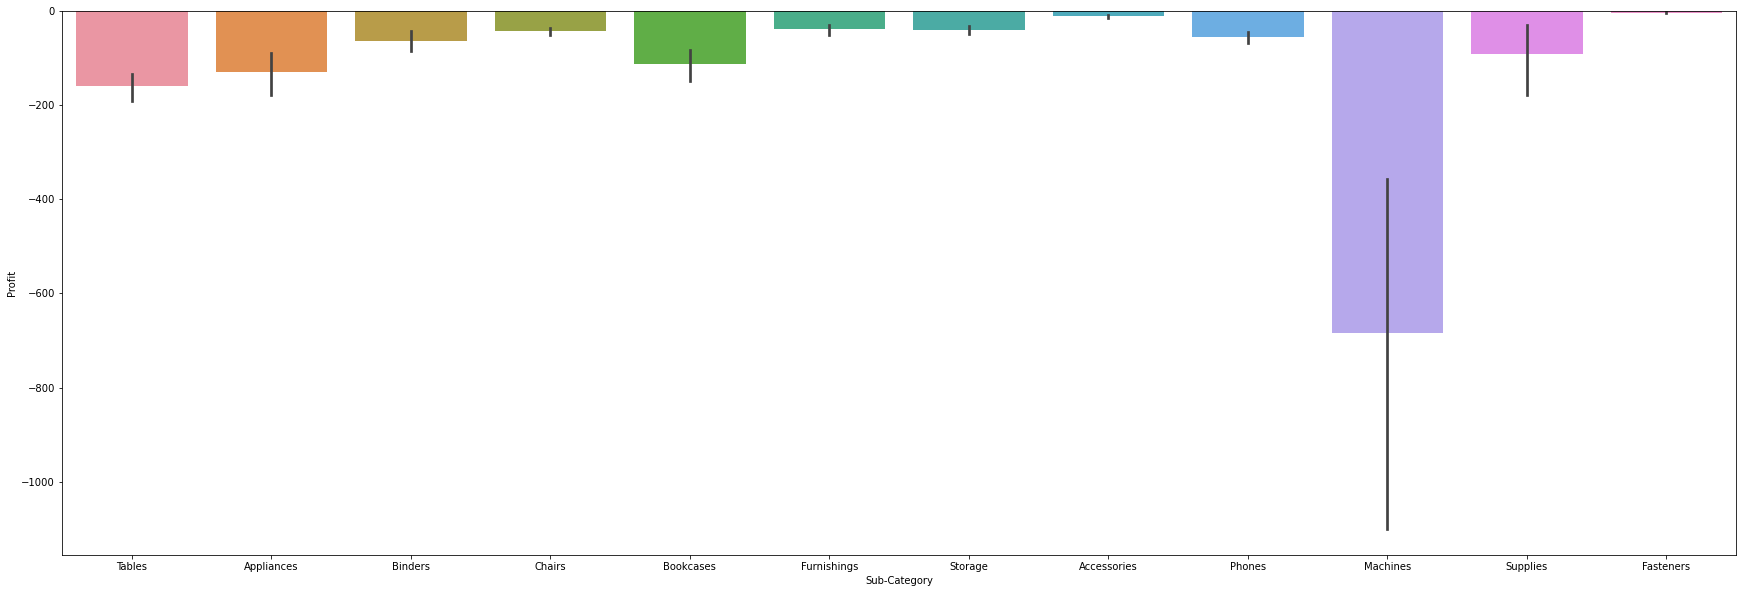

In [58]:
#creating a plot with sub category
plt.figure(figsize = (30,10))
sns.barplot(x = "Sub-Category", y = "Profit" , data = n_pro)

## "Machines" causes  more profit loss in some areas

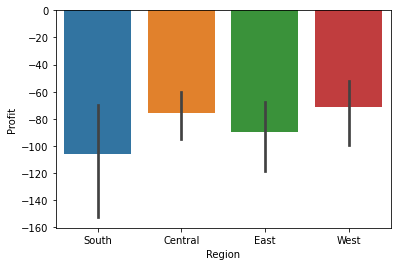

In [59]:
sns.barplot( x = "Region", y = "Profit" ,data = n_pro)

## South region made most profit loss in some category

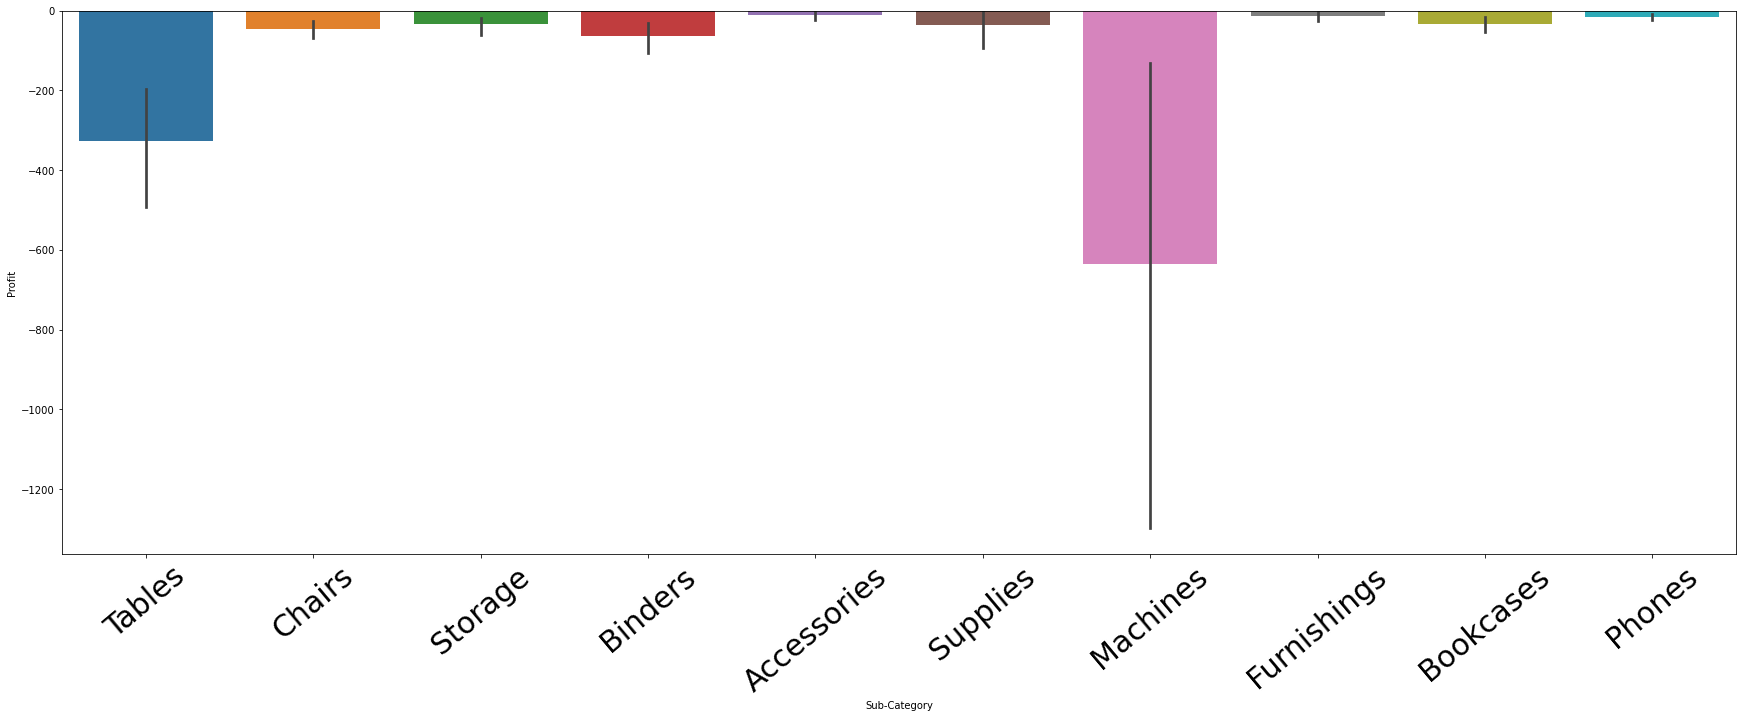

In [72]:
south_lo = data[(data.Region == 'South')&(data.Profit<0)]
plt.figure(figsize = (30,10))
plt.xticks(rotation = 40 , size =30)
sns.barplot(x = "Sub-Category", y = "Profit" , data = south_lo)

## Machines and Tables caused most of profit loss in south region

Text(0.5, 1.0, 'Profit loss in East')

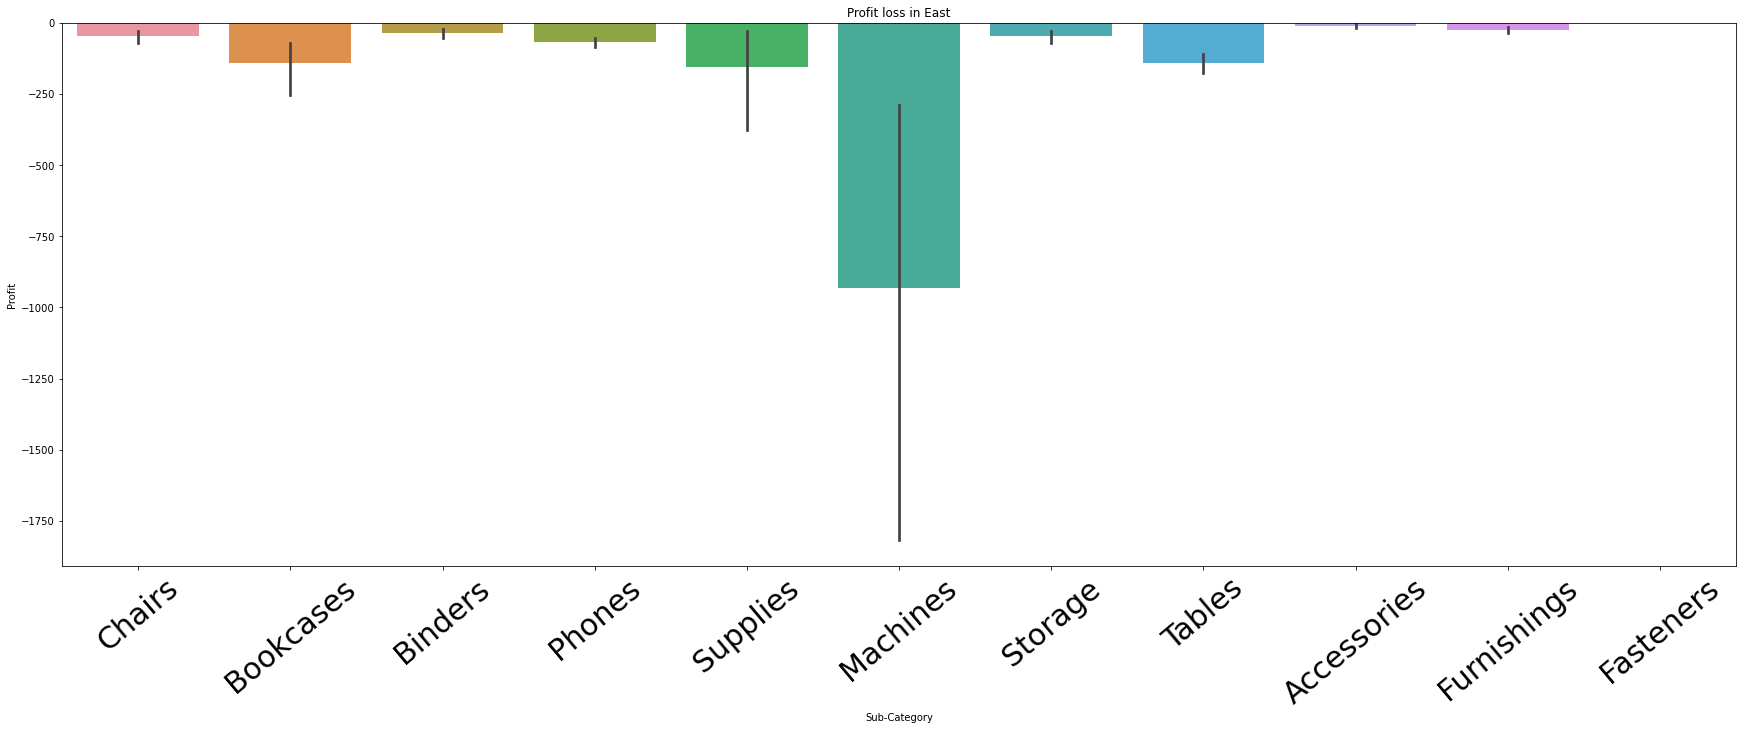

In [73]:
east_lo = data[(data.Region == 'East')&(data.Profit<0)]
plt.figure(figsize = (30,10))
plt.xticks(rotation = 40 , size = 30)
sns.barplot(x = "Sub-Category", y = "Profit" , data = east_lo)
plt.title("Profit loss in East")

 ## Machines caused most of the profit loss in East

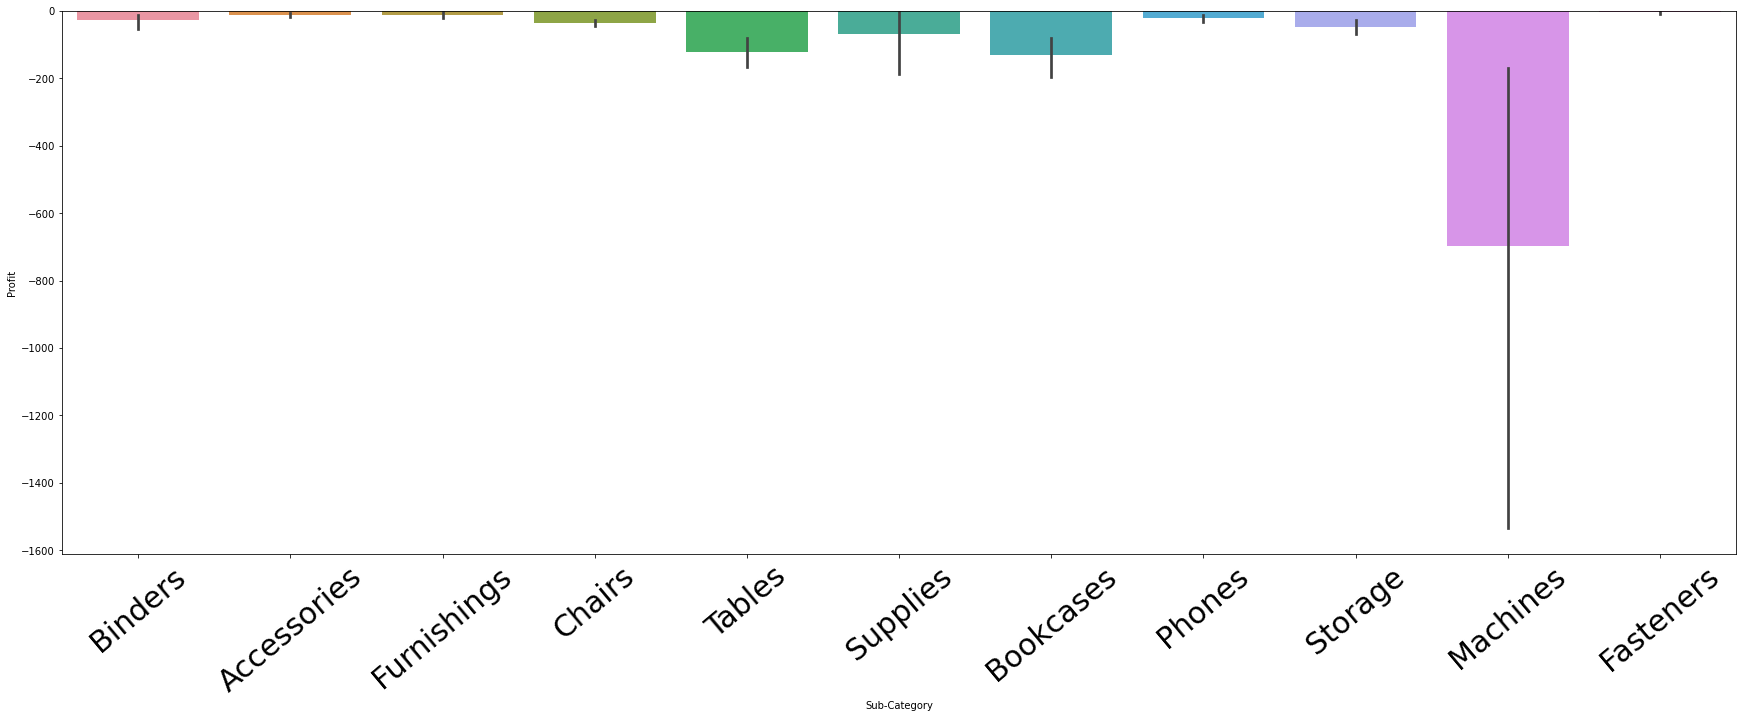

In [79]:
west_lo = data[(data.Region == 'West')&(data.Profit<0)]
plt.figure(figsize = (30,10))
plt.xticks(rotation = 40 , size = 30)
sns.barplot(x = "Sub-Category", y = "Profit" , data = west_lo)


## Similar to east region machines caused more loss in  West region also

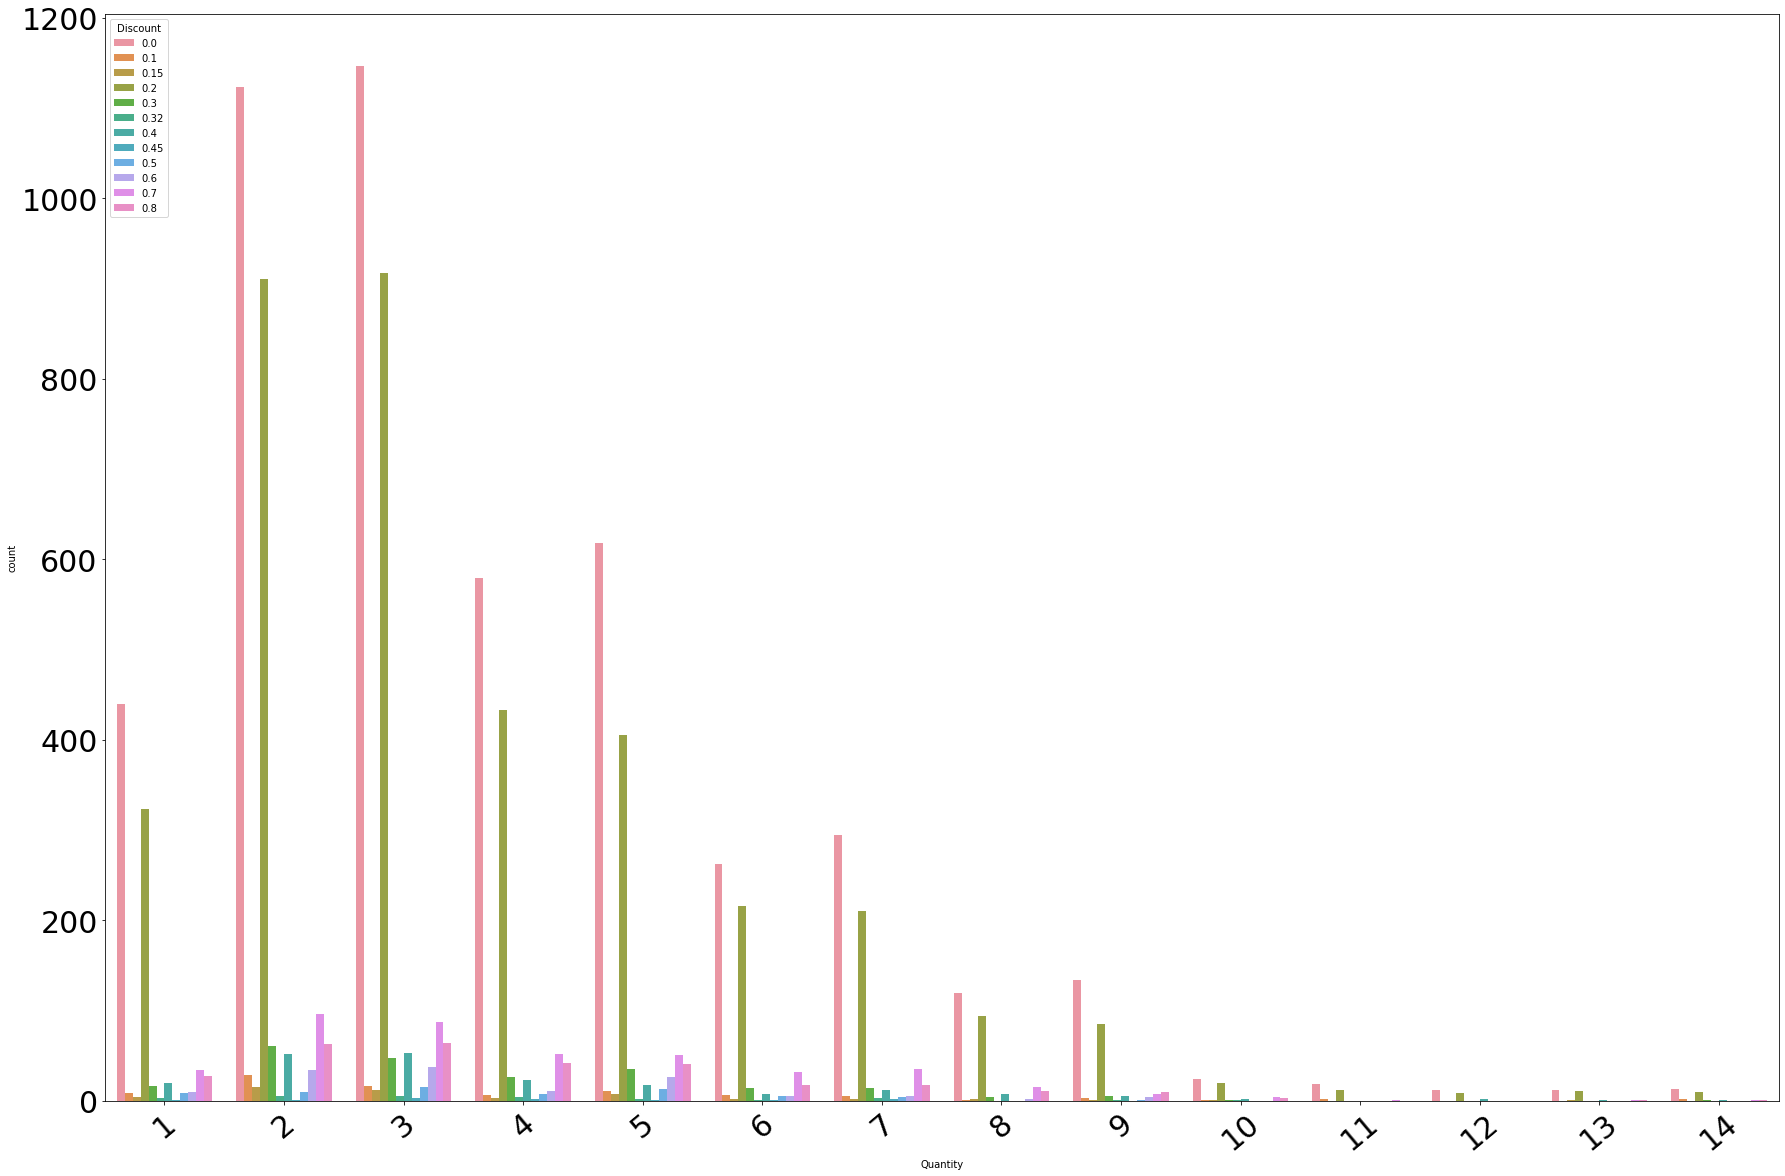

In [112]:
# checking relation btw discount and sales
plt.figure(figsize = (30,20))
plt.xticks(rotation = 40 , size = 30)
plt.yticks(size = 30)

sns.countplot( x = 'Quantity' , hue = 'Discount', data = data)